<a href="https://colab.research.google.com/github/malmusfer/Enron-fraud/blob/master/Enron_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](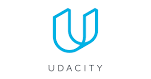 "Udacity") ![alt text](https://www.miskacademy.edu.sa/app/themes/misk-academy/images/logos.png "Misk") 


# Mini-Project: Analyze Data : Enron Fraud Data
## by: Almutairi, Muhanned
![alt text](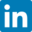 "LinkedIn profile")   [LinkedIn profile](https://www.linkedin.com/in/muhanned-almutairi-5bb1a5a0/)

## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering data](#Gathering)
- [Part II - Analysis](#Ana)


<a id='intro'></a>
### Introduction


The Enron fraud is a big, messy and totally fascinating story about corporate malfeasance of nearly every imaginable type. The Enron email and financial datasets are also big, messy treasure troves of information, which become much more useful once we know our way around them a bit. Udacity had combined the email and finance data into a single dataset, which we will explore in this mini-project.

<a id='Gathering'></a>
### Part I - Gathering data

In [1]:
!git clone https://github.com/udacity/ud120-projects

fatal: destination path 'ud120-projects' already exists and is not an empty directory.


In [2]:
import pickle
import pandas as pd
with open("/content/ud120-projects/final_project/final_project_dataset.pkl", "rb") as data_file:
  data_dict  = pickle.load(data_file)
  enron_data = pd.DataFrame.from_dict(data_dict, orient = 'index')

In [3]:
enron_data.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,94299,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,11200,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,78552,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,NaN,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,34039,32,5538001,32,11350,21,True,1617011,1035,853064,NaN


<a id='Ana'></a>
### Part II - Analysis

In [4]:
print("There are a total of {} people in the dataset." .format(len(enron_data.index)))

There are a total of 146 people in the dataset.


In [5]:
print("Out of which {} are POI and {} Non-POI." .format(enron_data['poi'].value_counts()[True], 
                                                 enron_data['poi'].value_counts()[False]))

Out of which 18 are POI and 128 Non-POI.


In [6]:
print("Total number of email plus financial features are {}. 'poi' column is our label.".format(len(enron_data.columns)-1))

Total number of email plus financial features are 20. 'poi' column is our label.


##What is the total value of the stock belonging to James Prentice? 

In [7]:
 print("What is the total value of the stock belonging to James Prentice?   : {}".format(enron_data['total_stock_value']['PRENTICE JAMES']))

What is the total value of the stock belonging to James Prentice?   : 1095040


##How many email messages do we have from Wesley Colwell to persons of interest?

In [8]:
 print("How many email messages do we have from Wesley Colwell to persons of interest?   : {}".format(enron_data['from_this_person_to_poi']['COLWELL WESLEY']))

How many email messages do we have from Wesley Colwell to persons of interest?   : 11


##What’s the value of stock options exercised by Jeffrey K Skilling? 

In [9]:
 print("What’s the value of stock options exercised by Jeffrey K Skilling?   : {}".format(enron_data['exercised_stock_options']['SKILLING JEFFREY K']))

What’s the value of stock options exercised by Jeffrey K Skilling?   : 19250000


##Of these three individuals (Lay, Skilling and Fastow), who took home the most money?

In [10]:
print("Of these three individuals (Lay, Skilling and Fastow), who took home the most money? Mr. Skilling : {}, Mr. Lay : {}, Mr. Fastow : {} ".format(enron_data['total_payments']['SKILLING JEFFREY K'], enron_data['total_payments']['LAY KENNETH L'] , enron_data['total_payments']['FASTOW ANDREW S']))

Of these three individuals (Lay, Skilling and Fastow), who took home the most money? Mr. Skilling : 8682716, Mr. Lay : 103559793, Mr. Fastow : 2424083 


In [11]:
enron_data.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
unique,95,87,40,126,5,42,112,19,45,125,95,58,102,65,93,42,2,53,84,98,18
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
freq,51,60,107,21,142,64,35,128,97,20,51,60,44,60,53,60,128,80,60,36,129


##How many folks in this dataset have a quantified salary? What about a known email address?



In [12]:
print( "How many folks in this dataset have a quantified salary? : {} What about a known email address? : {}".format(95, (enron_data.shape[0]) - ((enron_data.email_address == 'NaN').sum())))

How many folks in this dataset have a quantified salary? : 95 What about a known email address? : 111


##How many people in the E+F dataset (as it currently exists) have “NaN” for their total payments? What percentage of people in the dataset as a whole is this?

In [15]:
print('How many people in the dataset have “NaN” for their total payments? : {} , What percentage : {} '.format(sum(enron_data.total_payments.loc[:]=='NaN'), 100*(sum(enron_data.total_payments.loc[:]=='NaN')/enron_data.shape[0])))

How many people in the dataset have “NaN” for their total payments? : 21 , What percentage : 14.383561643835616 


##How many POIs in the E+F dataset have “NaN” for their total payments? What percentage of POI’s as a whole is this?



In [16]:
import numpy as np
nan = np.nan

In [17]:
print('How many POIs in the dataset have “NaN” for their total payments? : {}  '.format(len(enron_data.query("(poi == True) and (total_payments == @nan)"))))

How many POIs in the dataset have “NaN” for their total payments? : 0  


##What is the new number of people of the dataset? What is the new number of folks with “NaN” for total payments?

If you added in, say, 10 more data points which were all POI’s, and put “NaN” for the total payments for those folks, the numbers you just calculated would change.

In [18]:
print('what is number of people : {} , What is number of folks : {} '.format((enron_data.shape[0] + 10), sum(enron_data.total_payments.loc[:]=='NaN')+10))

what is number of people : 156 , What is number of folks : 31 


##What is the new number of POI’s in the dataset? What is the new number of POI’s with NaN for total_payments?

In [19]:
print('what is number of POI : {} , What is number of POIs with NaN : {} '.format((enron_data['poi'].value_counts()[True] + 10), len(enron_data.query("(poi == True) and (total_payments == @nan)"))+10))

what is number of POI : 28 , What is number of POIs with NaN : 10 
